In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.0 - EDA uppvärmning

In [456]:
# load in datas
cardio_train = pd.read_csv("cardio_train.csv", sep=";")
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [457]:
cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [458]:
disease_count = cardio_train.cardio.value_counts()
print(f"Number of positive is: {disease_count[1]}")
print(f"Number of negative is: {disease_count[0]}")


Number of positive is: 34979
Number of negative is: 35021


In [459]:
cardio_train[["cholesterol"]].value_counts()

cholesterol
1              52385
2               9549
3               8066
dtype: int64

Text(0.5, 1.0, 'Kolesterolvärden')

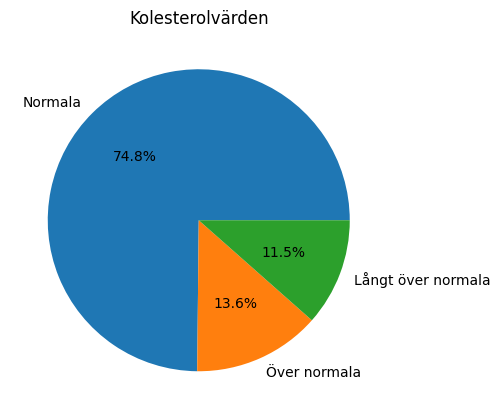

In [460]:
plt.figure(figsize=(5,5), dpi=100)
plt.pie(cardio_train[["cholesterol"]].value_counts(), autopct="%1.1f%%", labels=["Normala", "Över normala", "Långt över normala"])
plt.title("Kolesterolvärden")

Text(0.5, 1.0, 'Age distribution')

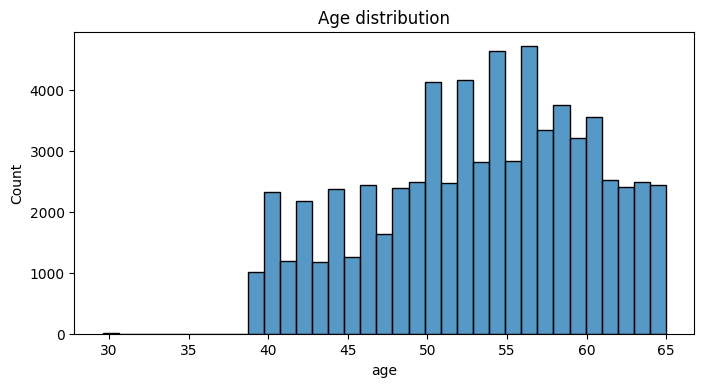

In [461]:
cardio_train["age"] = round(cardio_train["age"]/365, 1)
plt.figure(figsize=(8,4), dpi=100)
sns.histplot(cardio_train["age"], bins=35)
plt.title("Age distribution")

In [462]:
smoke_percent = (cardio_train[["smoke"]].value_counts()[1]/cardio_train[["smoke"]].count())*100
smoke_percent
# About 8.8% smokers

smoke    8.812857
dtype: float64

Text(0.5, 1.0, 'Weight distribution')

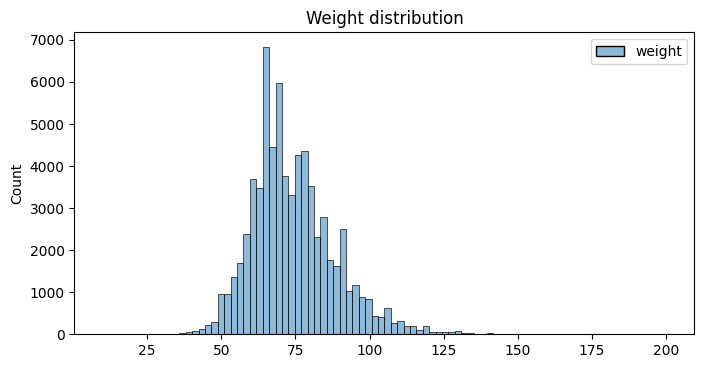

In [463]:
plt.figure(figsize=(8,4), dpi=100)
sns.histplot(cardio_train[["weight"]], bins=88)
plt.title("Weight distribution")

Text(0.5, 1.0, 'Height distribution')

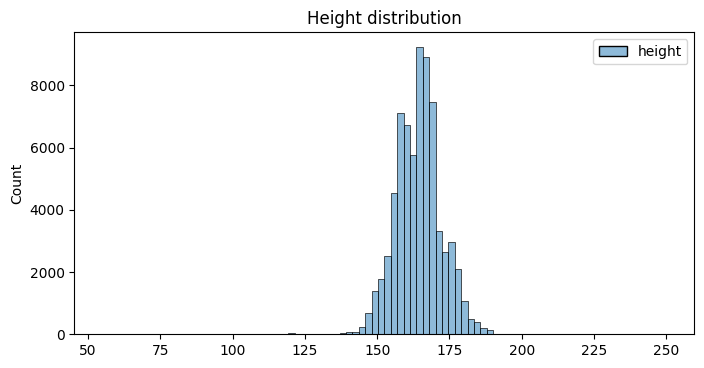

In [464]:
plt.figure(figsize=(8,4), dpi=100)
sns.histplot(cardio_train[["height"]], bins=88)
plt.title("Height distribution")

Text(0.5, 1.0, 'Disease in gender')

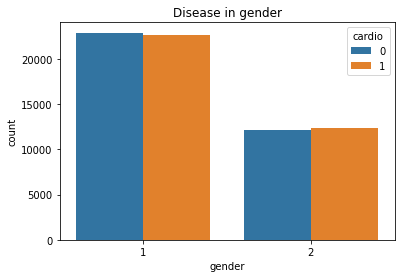

In [465]:
sns.countplot(x='gender',hue="cardio",data=cardio_train)
plt.title("Disease in gender")

## 2.1.0 - Feature engineering BMI


In [466]:
cardio_train["BMI"] = cardio_train["weight"]/((cardio_train["height"]/100)**2)
cardio_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,61.9,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61.5,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [467]:
cardio_train["BMI"].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

<AxesSubplot:>

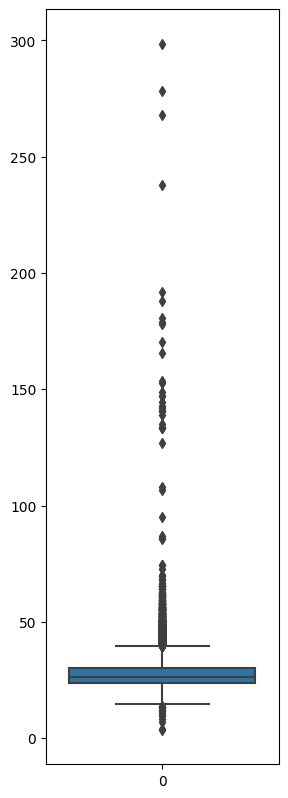

In [468]:
plt.figure(figsize=(3,10), dpi = 100)
sns.boxplot(data = cardio_train["BMI"])
# boxplot for BMI

The distribution of BMI has a skew and we keep the values within mean ± 3 $\sigma$, which 99.7% of the dataset included but outliers droped.

In [469]:
BMI_mean = cardio_train["BMI"].mean()
BMI_std = cardio_train["BMI"].std()

cardio_train_BMI = cardio_train[(BMI_mean-3*BMI_std < cardio_train["BMI"]) & (BMI_mean+3*BMI_std > cardio_train["BMI"])]
cardio_train_BMI.BMI.describe()

count    69464.000000
mean        27.328387
std          4.903914
min          9.331007
25%         23.875115
50%         26.314635
75%         30.110279
max         45.820235
Name: BMI, dtype: float64

Notice here the max value is down to 45 and total counts only reduced by 532. It means that the proportion of outliers is small but big impact on data.

In [470]:
def BIM_categories(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 25:
        return 'Normal_range'
    elif 25.0 <= BMI < 30:
        return 'Overweight'
    elif 30.0 <= BMI < 35:
        return 'Obese_1'
    elif 35.0 <= BMI < 40:
        return 'Obese_2'
    else:
        return 'Obese_3'

In [471]:
cardio_train_BMI["BIM_categories"] = cardio_train_BMI[["BMI"]].apply(lambda x: BIM_categories(*x), axis= 1)
cardio_train_BMI

C:\Users\Kun\AppData\Local\Temp\ipykernel_15916\635540010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_train_BMI["BIM_categories"] = cardio_train_BMI[["BMI"]].apply(lambda x: BIM_categories(*x), axis= 1)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BIM_categories
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal_range
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese_1
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal_range
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal_range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57.7,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,Overweight
69995,99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight
69997,99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Obese_1
69998,99998,61.5,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight


## 2.1.1 - Feature engineering blodtryck


In [472]:
cardio_train["ap_hi"].describe(), cardio_train["ap_lo"].describe()

(count    70000.000000
 mean       128.817286
 std        154.011419
 min       -150.000000
 25%        120.000000
 50%        120.000000
 75%        140.000000
 max      16020.000000
 Name: ap_hi, dtype: float64,
 count    70000.000000
 mean        96.630414
 std        188.472530
 min        -70.000000
 25%         80.000000
 50%         80.000000
 75%         90.000000
 max      11000.000000
 Name: ap_lo, dtype: float64)

<AxesSubplot:>

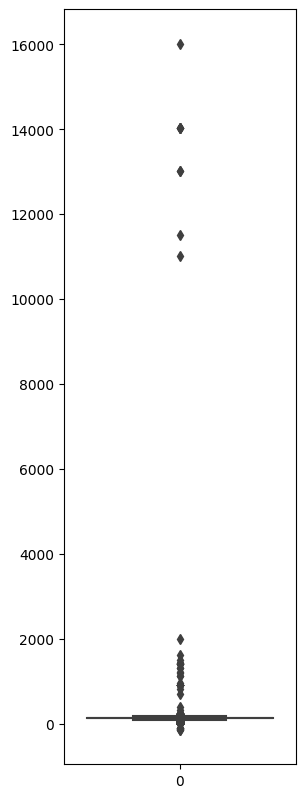

In [473]:
plt.figure(figsize=(3,10), dpi = 100)
sns.boxplot(data = cardio_train["ap_hi"])

<AxesSubplot:>

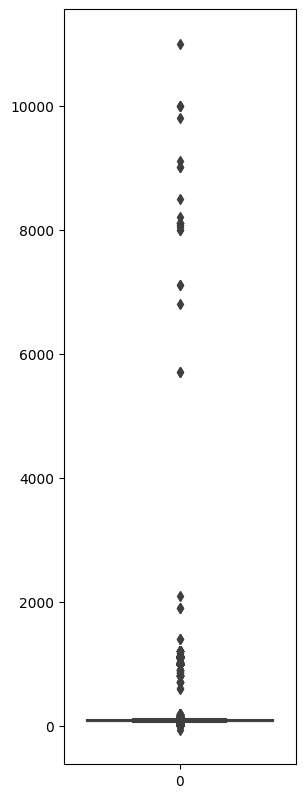

In [474]:
plt.figure(figsize=(3,10), dpi = 100)
sns.boxplot(data = cardio_train["ap_lo"])

- The distributions of ap_hi and ap_lo is highly skewed by some outliers and $std$ is also large consequently. 
- Based on the healthline's description of blood pressure, I decided to remove some extreme values.
- When systolic is over 250 or diastolic over 200, and systolic less than 50 or diastolic less than 30 can lead to human shock/death, so the values beyond the range is no reference value.

In [475]:
cardio_train_BP = cardio_train[(cardio_train["ap_hi"] < 250) & (cardio_train["ap_lo"] < 200) & (cardio_train["ap_hi"]> 50) & (cardio_train["ap_lo"] > 30)]

cardio_train_BP["ap_hi"].describe(), cardio_train_BP["ap_lo"].describe()

(count    68775.000000
 mean       126.614846
 std         16.763475
 min         60.000000
 25%        120.000000
 50%        120.000000
 75%        140.000000
 max        240.000000
 Name: ap_hi, dtype: float64,
 count    68775.000000
 mean        81.382043
 std          9.676889
 min         40.000000
 25%         80.000000
 50%         80.000000
 75%         90.000000
 max        190.000000
 Name: ap_lo, dtype: float64)

In [476]:
def BP_categories(systolic, diastolic):
    if systolic > 180 or diastolic > 120:
        return 'Crisis'
    elif (140 <= systolic < 180) or (90 <= diastolic < 120):
        return 'HBP_stage2'
    elif (130 <= systolic < 140) or (80 <= diastolic < 90) :
        return 'HBP_stage1'
    elif (120 <= systolic < 130) and diastolic < 80:
        return 'Elevated'
    else:
        return 'Healthy'

In [477]:
cardio_train_BP['HTN_stage'] = cardio_train_BP[['ap_hi', 'ap_lo']].apply(lambda x: BP_categories(*x), axis= 1)
cardio_train_BP

C:\Users\Kun\AppData\Local\Temp\ipykernel_15916\4145640152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_train_BP['HTN_stage'] = cardio_train_BP[['ap_hi', 'ap_lo']].apply(lambda x: BP_categories(*x), axis= 1)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,HTN_stage
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,HBP_stage1
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,HBP_stage2
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,HBP_stage1
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,HBP_stage2
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,HBP_stage1
69996,99995,61.9,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,HBP_stage2
69997,99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,HBP_stage2
69998,99998,61.5,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,HBP_stage1


-  Categarical method reference to 
- https://www.kaggle.com/code/cassienutter/cvd-classification-with-eda-models-hyperparams

## 2.2.0 - Visualiseringar andel sjukdomar


In [478]:
# merge two dataframe (with HTN_stage and BIM_categories) to one
cardio_train_new = pd.merge(cardio_train_BMI, cardio_train_BP)
cardio_train_new

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BIM_categories,HTN_stage
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal_range,HBP_stage1
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese_1,HBP_stage2
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal_range,HBP_stage1
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight,HBP_stage2
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal_range,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68261,99992,57.7,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,Overweight,HBP_stage2
68262,99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight,HBP_stage1
68263,99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Obese_1,HBP_stage2
68264,99998,61.5,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight,HBP_stage1


Text(0.5, 0.98, 'Features against the proportion positive for cardiovascular disease')

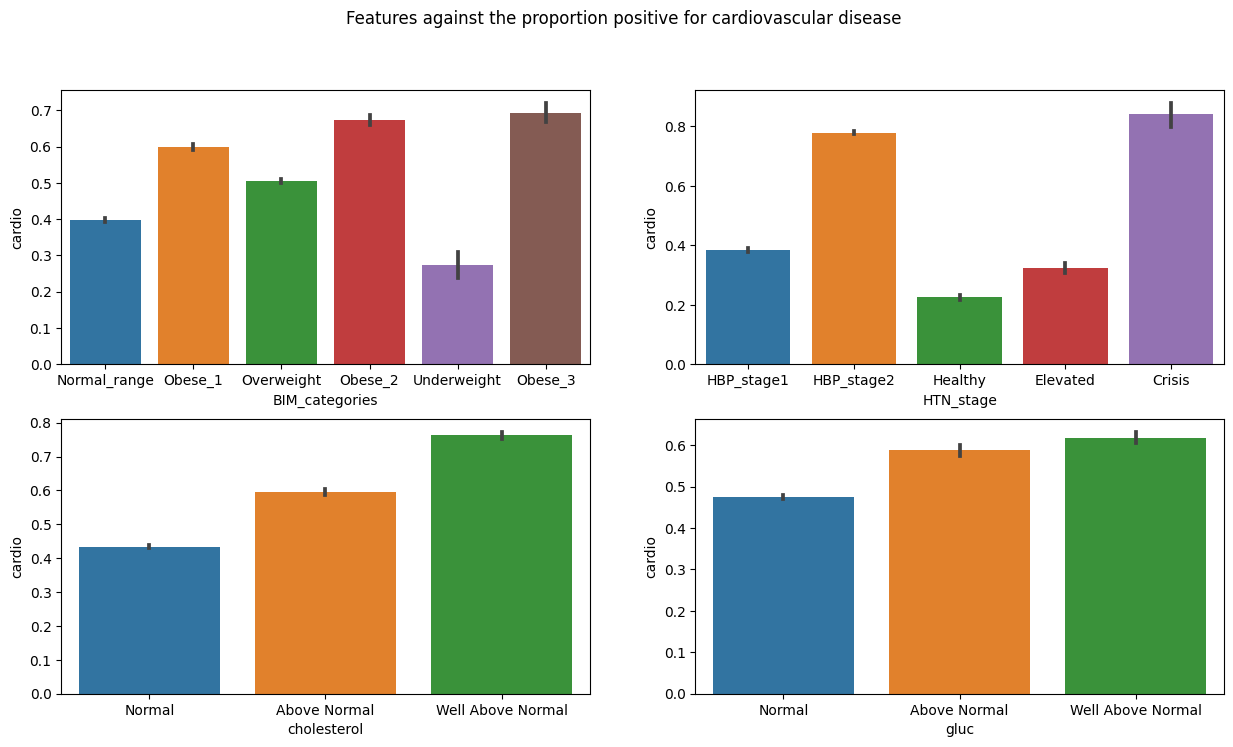

In [492]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
sns.barplot(data = cardio_train_new, x = "BIM_categories", y = "cardio", ax = axes[0,0])
sns.barplot(data = cardio_train_new, x = "HTN_stage", y = "cardio", ax = axes[0,1])
sns.barplot(data = cardio_train_new, x = "cholesterol", y = "cardio", ax = axes[1,0]).set_xticklabels(["Normal", "Above Normal", "Well Above Normal"])
sns.barplot(data = cardio_train_new, x = "gluc", y = "cardio", ax = axes[1,1]).set_xticklabels(["Normal", "Above Normal", "Well Above Normal"])

fig.suptitle("Features against the proportion positive for cardiovascular disease")

## 2.2.1 - Visualiseringar korrelation

In [502]:
cardio_train_new_corr = cardio_train_new.drop(columns=['id', 'BIM_categories', 'HTN_stage'])
cardio_train_new_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68261,57.7,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
68262,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
68263,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
68264,61.5,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


Text(0.5, 1.0, 'Correlation between Features')

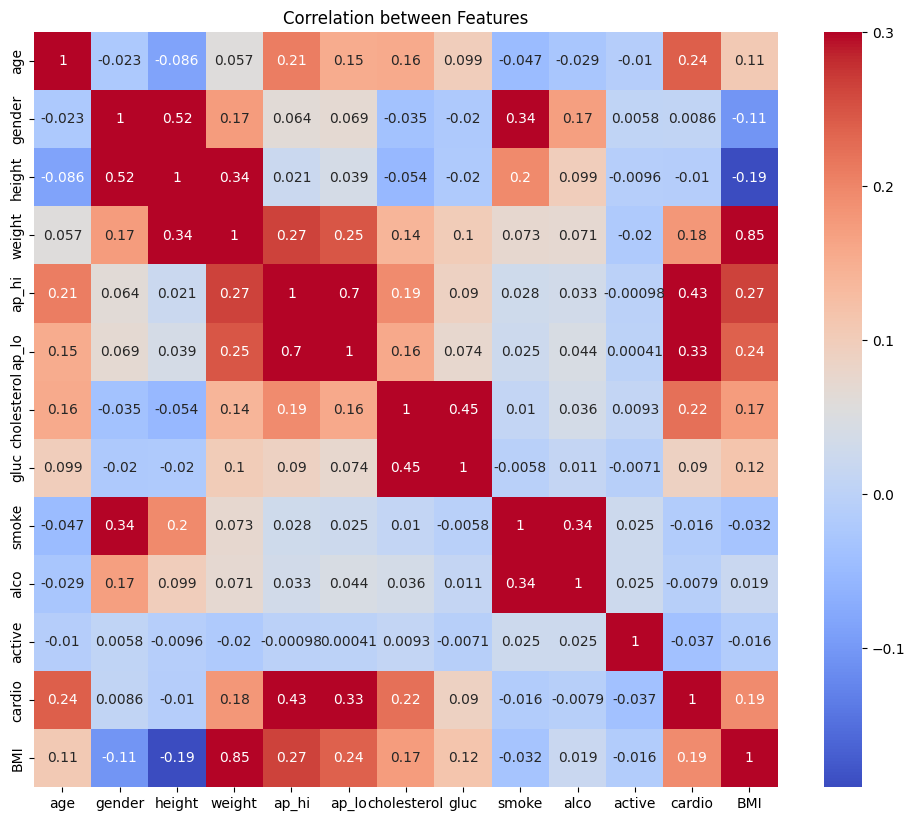

In [525]:
plt.figure(figsize=(12,10), dpi = 100)
sns.heatmap(cardio_train_new_corr.corr(), vmax=.3, annot=True, cmap= 'coolwarm')
plt.title('Correlation between Features')

### |corr| > 0.4 :
- weight vs BMI $(corr = 0.85)$ : Fat is one of the causation of high BMI
- height vs gender $(corr = 0.52)$: males is more higher than females on average
- cardio vs ap_hi & ap_lo $(corr = 0.43, 0.33)$ : cardiovascular disease seems a slightly relation with blood pressure
- Glucose vs cholesterol $(corr = 0.45)$: Glucose intake has a certain effect on cholesterol levels.